In [1]:
import pandas as pd
import numpy as np

df_adv = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/Advertising.csv")
#Prints the top 10 observations
df_adv.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [2]:
# Massaging a table

df_adv_new = pd.melt(df_adv, id_vars ='Sales', value_vars = ['Radio', 'Newspaper', 'TV'], value_name = 'adv_budget', var_name = 'Medium')
df_adv_new.head(10)

,Sales,Medium,adv_budget
0,22.1,Radio,37.8
1,10.4,Radio,39.3
2,9.3,Radio,45.9
3,18.5,Radio,41.3
4,12.9,Radio,10.8
5,7.2,Radio,48.9
6,11.8,Radio,32.8
7,13.2,Radio,19.6
8,4.8,Radio,2.1
9,10.6,Radio,2.6


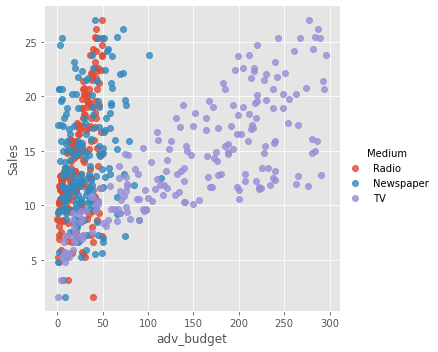

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.lmplot(x = 'adv_budget',y = 'Sales', data = df_adv_new, hue = 'Medium', fit_reg = False)

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


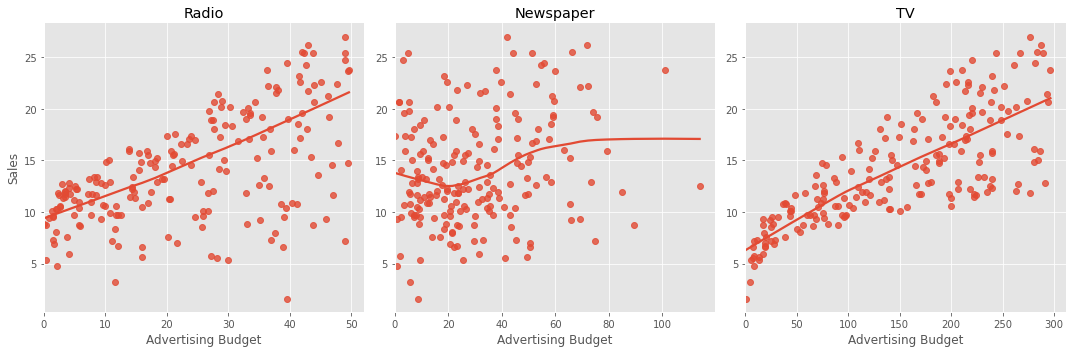

In [4]:
#Plotting for different values of Medium

lm = sns.lmplot(x = 'adv_budget', y = 'Sales', data = df_adv_new, col = 'Medium', sharex= False, sharey = False, lowess = True)
axes = lm.axes

for i, ax in enumerate(axes[0]):
    ax.set_xlim(0,)
    ax.set_title(lm.col_names[i])
    ax.set_xlabel('Advertising Budget')
    

In [5]:
num_points = 30

In [6]:
np.random.seed(12345)
x = np.linspace(1, 13, num_points).reshape(-1,1)
error = np.random.randn(num_points, 1)*num_points
f= lambda x: (x-2) * (x-6) * (x-12)

y= f(x) + error

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [8]:
poly = PolynomialFeatures(10)
X = poly.fit_transform(x)

In [9]:
obs_nums = np.arange(0,num_points)
np.random.shuffle(obs_nums)

top_70 = int(num_points*0.7)
rand_train = np.sort(obs_nums[:top_70])
rand_test = np.sort(obs_nums[top_70:])

In [10]:
X_train = X[rand_train]
X_test = X[rand_test]
Y_train = y[rand_train]
Y_test = y[rand_test]

In [11]:
linreg = LinearRegression()
linreg.fit(X_train[:, :2], Y_train)
Y_train_2 = linreg.predict(X_train[:,:2])
Y_test_2 = linreg.predict(X_test[:, :2])

linreg.fit(X_train[:, :4], Y_train)
Y_train_4 = linreg.predict(X_train[:,:4])
Y_test_4 = linreg.predict(X_test[:, :4])

linreg.fit(X_train[:, :10], Y_train)
Y_train_10 = linreg.predict(X_train[:,:10])
Y_test_10 = linreg.predict(X_test[:, :10])

In [12]:
errors_train = np.array([np.mean((Y_train - Y_train_2)**2),np.mean((Y_train - Y_train_4)**2), np.mean((Y_train - Y_train_10)**2)])
errors_train = np.column_stack(([2,4,10], errors_train))


errors_test = np.array([np.mean((Y_test - Y_test_2)**2),np.mean((Y_test - Y_test_4)**2), np.mean((Y_test - Y_test_10)**2)])
errors_test = np.column_stack(([2,4,10], errors_test))

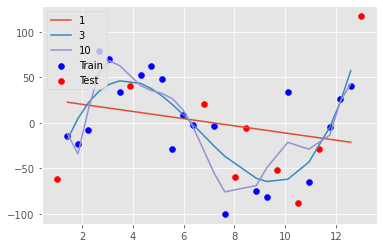

In [13]:
plt.scatter(X_train[:,1], Y_train, c= 'b', label = 'Train')
plt.scatter(X_test[:,1], Y_test, c = 'r', label = 'Test')

plt.plot(X_train[:,1], Y_train_2, label = '1')
plt.plot(X_train[:,1], Y_train_4, label = '3')
plt.plot(X_train[:,1], Y_train_10, label = '10')

plt.legend(loc = 2)

Text(0, 0.5, 'MSE')

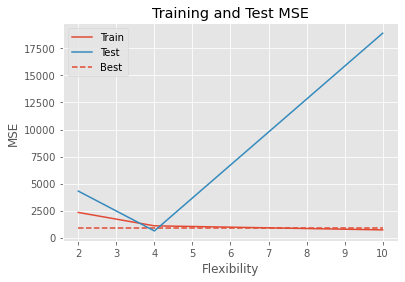

In [14]:
plt.plot(errors_train[:,0], errors_train[:,1], label = 'Train')
plt.plot(errors_test[:,0], errors_test[:,1], label = 'Test')
plt.hlines(900, 2, 10, label = 'Best', linestyle = '--' )

plt.legend()
plt.title('Training and Test MSE')
plt.xlabel('Flexibility')
plt.ylabel('MSE')

## Problem Set Solutions

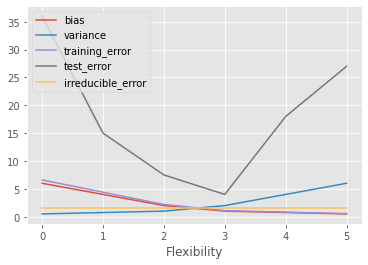

In [15]:
# Problem 3

bias = np.array([6,4,2,1,0.75,0.5])
variance = bias[::-1]
training_error = bias * 1.1
test_error = np.array([36, 15, 7.5, 4, 18, 27])
irreducible_error = np.ones(6)*1.5
flexibility = np.arange(0,10,2)

df_3 = pd.DataFrame({'bias':bias,'variance':variance, 'training_error':training_error, 'test_error':test_error, 'irreducible_error':irreducible_error})
df_3.plot()
x_values = range(0,6,1)
plt.xlabel('Flexibility')
plt.xticks(x_values)
plt.legend(loc = 2)

In [16]:
# Problem 7

df_7 = pd.DataFrame({'X_1':[0,2,0,0,-1,1], 'X_2':[3,0,1,1,0,1], 'X_3':[0,0,3,2,1,1], 'Y':['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})

In [17]:
# Part a
import math 
from statistics import mode

origin = [0,0,0]
distan =[]

def distance(x:list,y:list)->float:
    dist = math.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2 + (x[2]-y[2])**2)
    return dist

# Part b
# Finding the nearest neighbor when K = 1


def mini_one(x:list)->str:
    mini_index = df_7['Origin_Distance'].idxmin()
    return df_7.loc[mini_index, 'Y']

# Part c 
# Finding the nearest neighbor when K = 3

def mini_three(x:list)->str:
   df_7.sort_values(by= 'Origin_Distance')
   df_7_new = df_7.sort_values(by= 'Origin_Distance').iloc[:3]
   print(df_7_new)
   prediction_list = df_7_new['Y']
   prediction = mode(prediction_list)
   return prediction
   
for index, rows in df_7.iterrows():
    distan.append(distance([rows['X_1'], rows['X_2'], rows['X_3']], origin))

df_7['Origin_Distance'] = distan

prediction_one = mini_one(origin)
print("Predicition with K = 1 is:", prediction_one)

prediction_three = mini_three(origin)
print("Prediction with K = 3 is: ", prediction_three)    

Predicition with K = 1 is: Green
   X_1  X_2  X_3      Y  Origin_Distance
4   -1    0    1  Green         1.414214
Prediction with K = 3 is:  Green


In [18]:
# Problem No 8

# a - Importing the college dataset

college = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/college.csv")
college.index.name = 'College Name'
college

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
College Name,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49


In [19]:
# b - To summarize the dataset use the describe command

college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


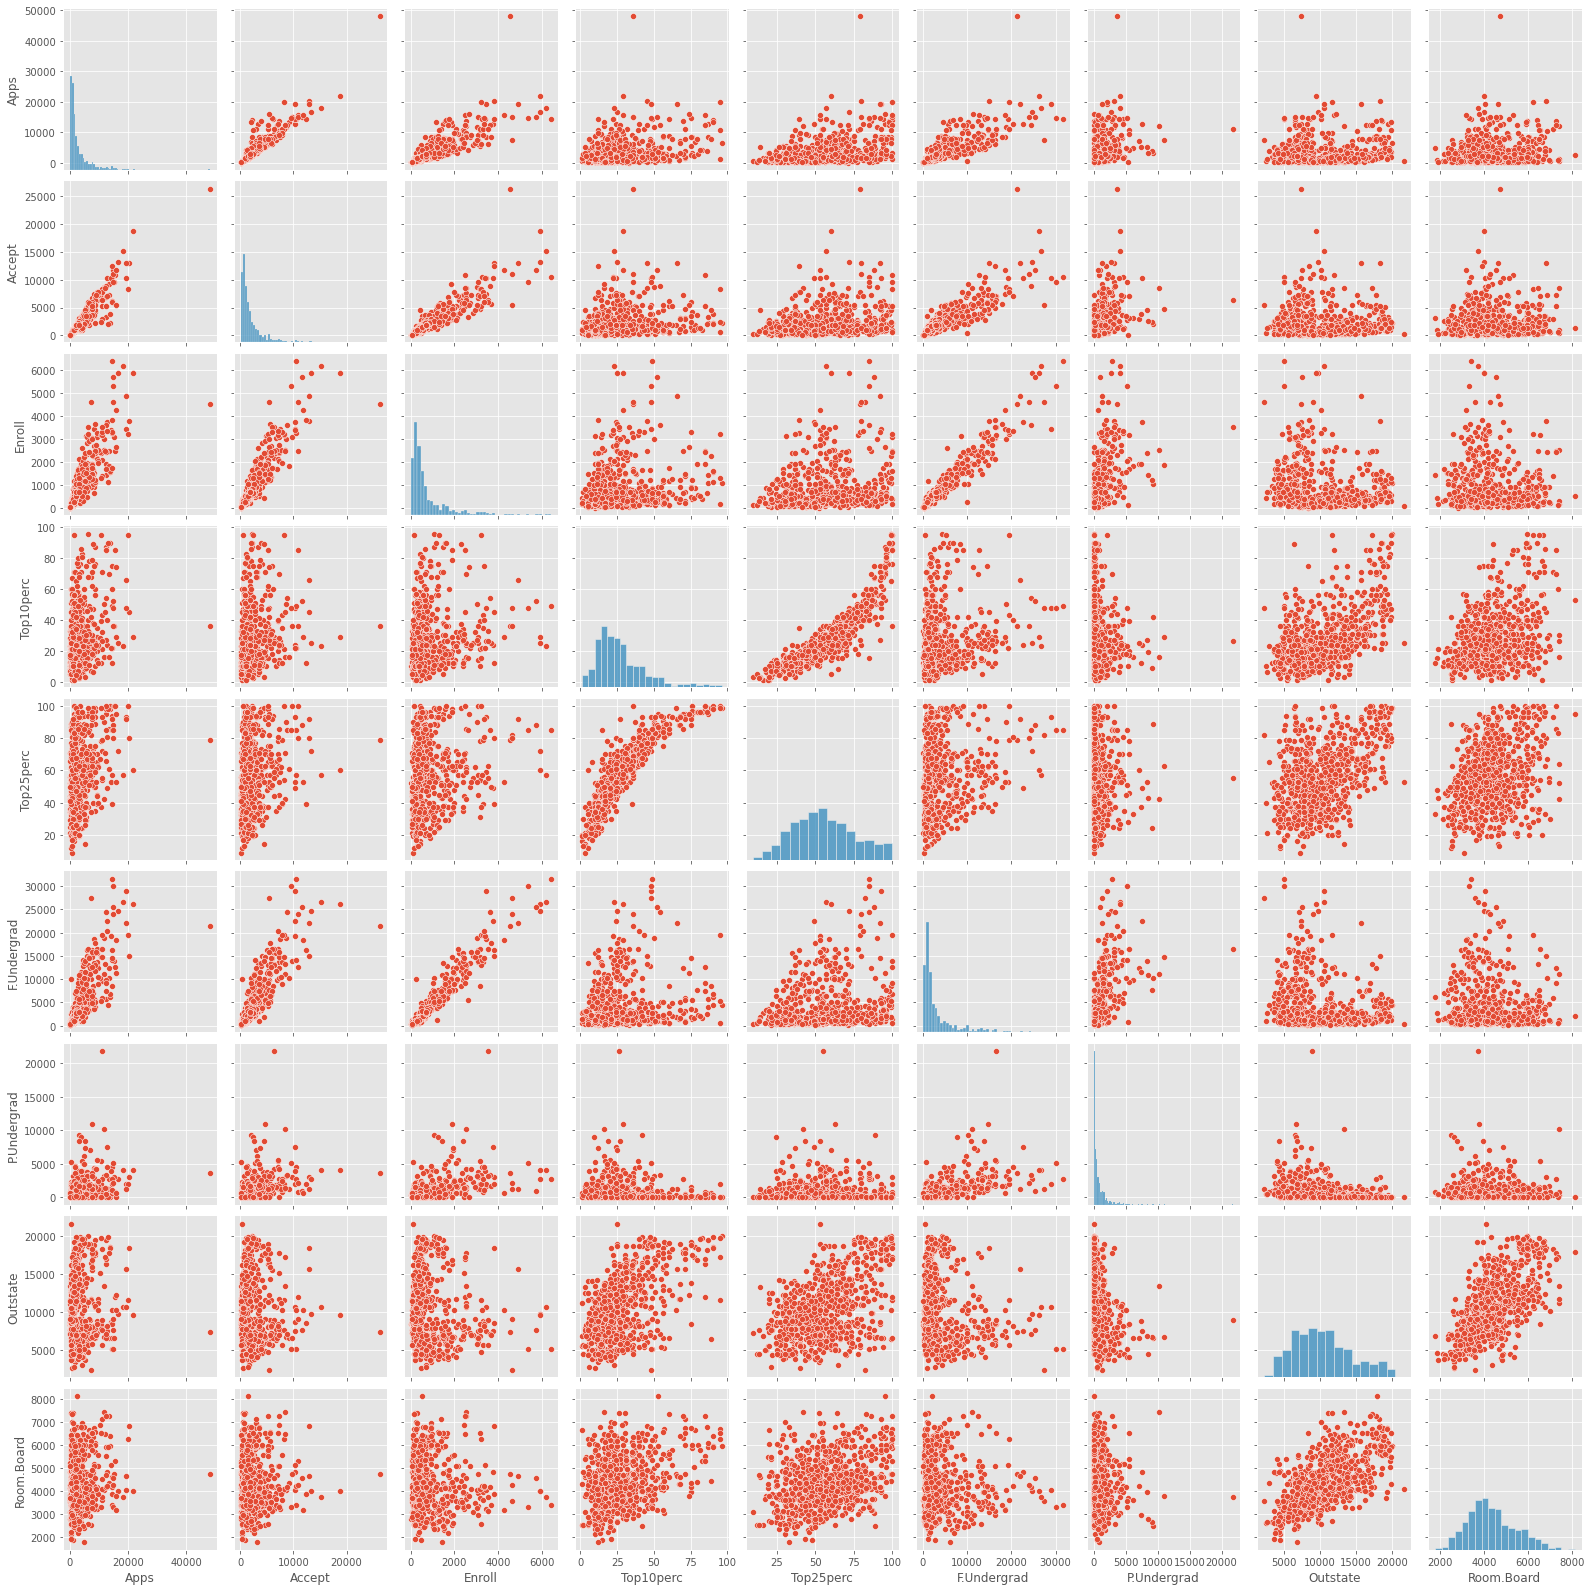

In [40]:
# Paired Scatterplot of first 10 variables

sns.pairplot(college.iloc[:,:10])

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Private', ylabel='Outstate'>

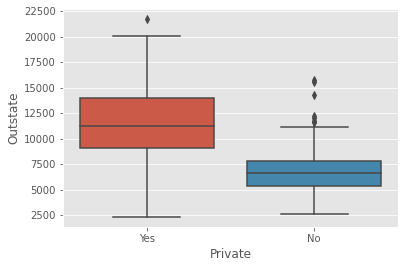

In [21]:
# Box Plots of Outstate vs Private

sns.boxplot('Private', 'Outstate', data = college)

/Users/sriramnatarajan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Elite
No       699
Yes       78
dtype: int64

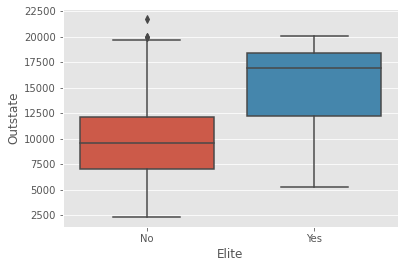

In [22]:
# creating new variable - Elite

college['Elite'] = pd.Categorical(np.where(college['Top10perc']>50, 'Yes', 'No'))
sns.boxplot('Elite','Outstate', data = college)
college.value_counts(subset = ['Elite'])

Text(0.5, 1.0, 'Percentage Accepted')

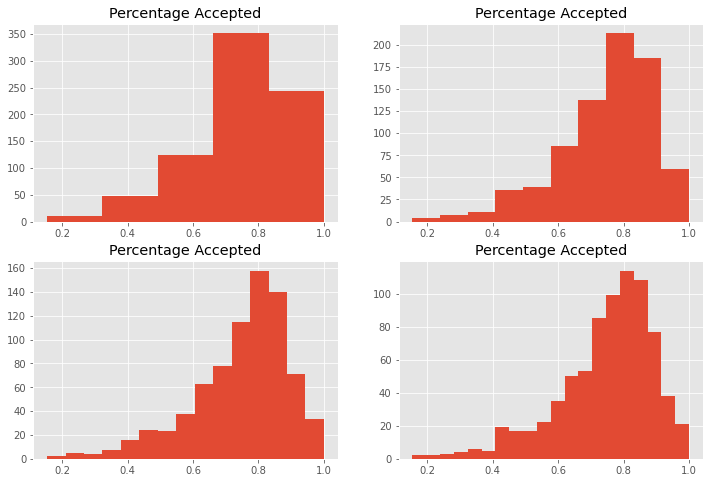

In [23]:
# Part v

fig, ax = plt.subplots(2,2, figsize = (12,8))

ax[0,0].hist(college['Accept']/college['Apps'], bins = 5)
ax[0,0].set_title('Percentage Accepted')

ax[0,1].hist(college['Accept']/college['Apps'], bins = 10)
ax[0,1].set_title('Percentage Accepted')

ax[1,0].hist(college['Accept']/college['Apps'], bins = 15)
ax[1,0].set_title('Percentage Accepted')

ax[1,1].hist(college['Accept']/college['Apps'], bins = 20)
ax[1,1].set_title('Percentage Accepted')

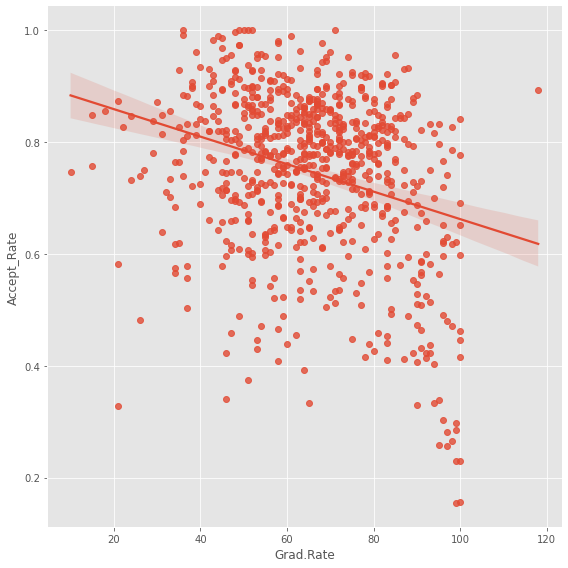

In [24]:
#vi 
#Acceptance and Graduation Rate are negatively correlated

college['Accept_Rate'] = college['Accept']/college['Apps']
sns.lmplot(x = 'Grad.Rate',y = 'Accept_Rate', data = college, height = 8)

###### 9. Using Auto data

In [25]:
# a. Loading the data and describing the data type

auto = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/auto.csv")
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [26]:
# b and c. Range, mean and sd of each quantitative predictor

auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [27]:
auto.iloc[10:85, :]
auto.drop(auto.index[10:85], inplace = True)
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


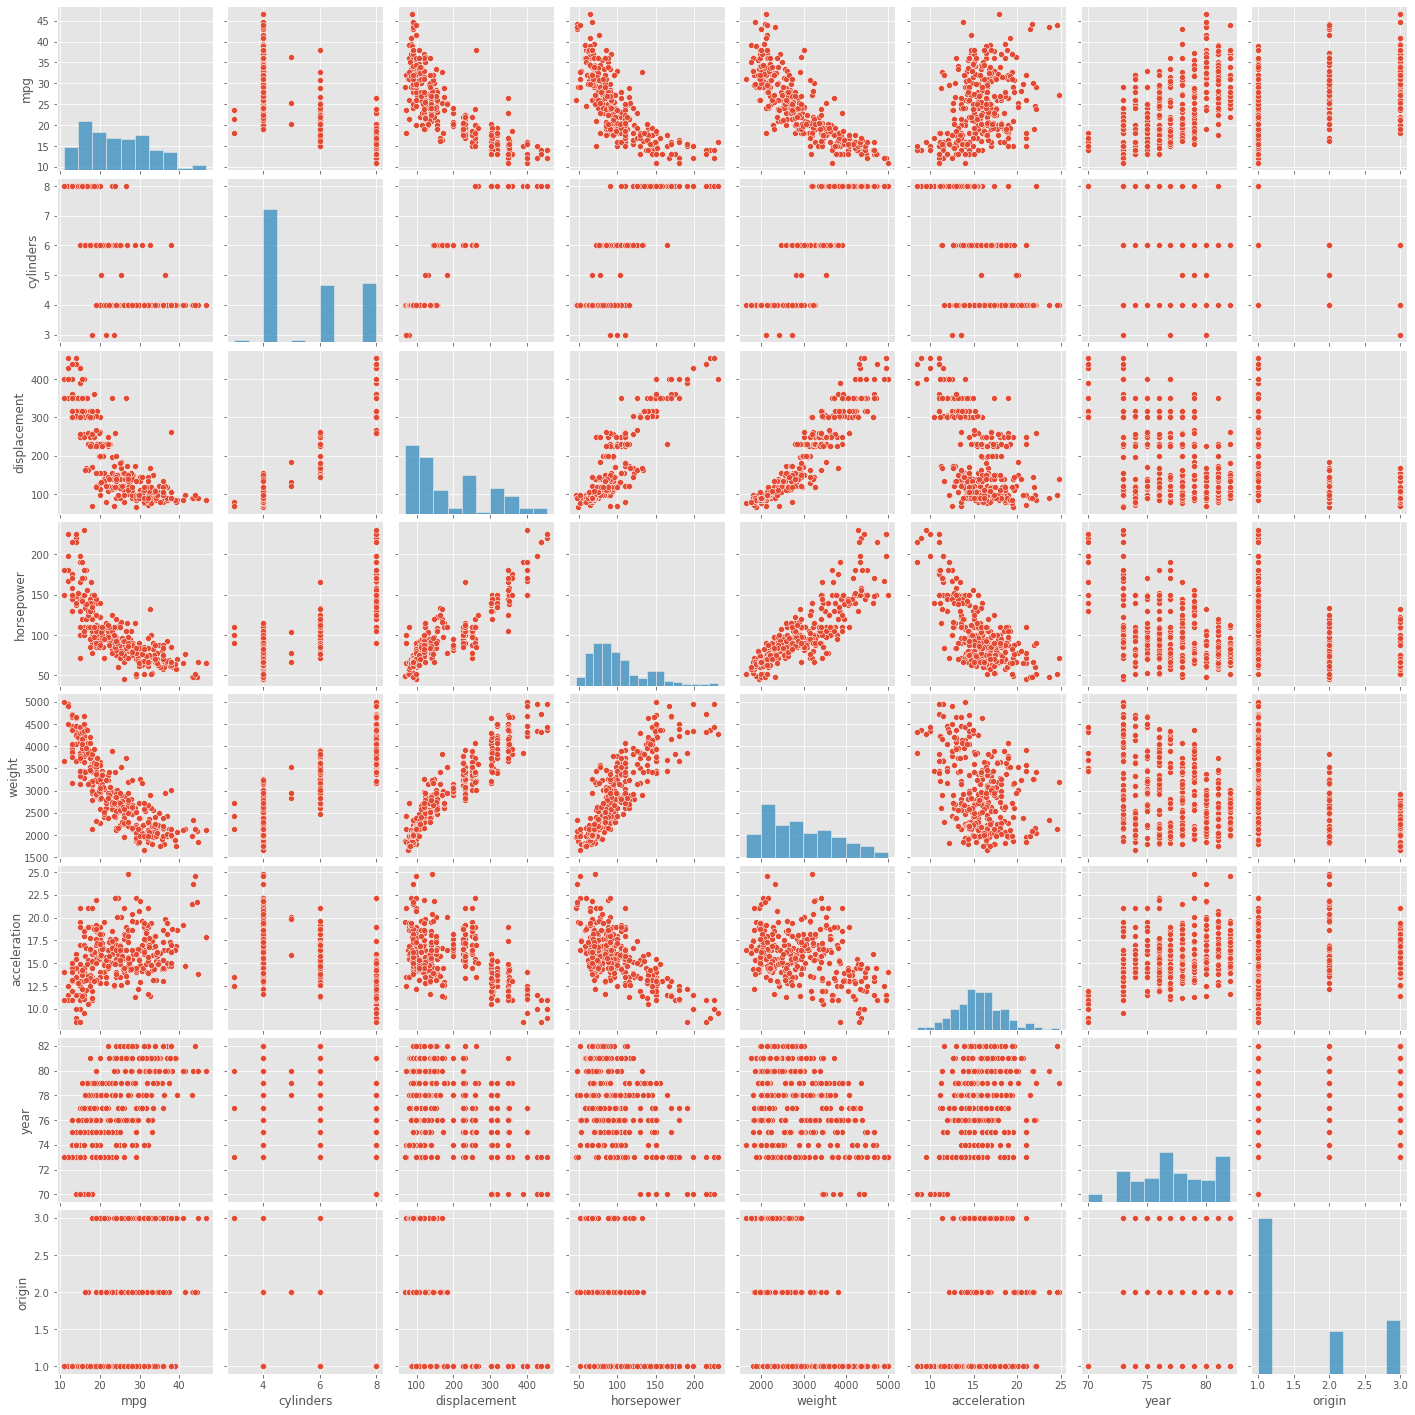

In [28]:
sns.pairplot(auto)

###### 10. Boston Housing Data Set

In [29]:
Boston = pd.read_csv("/Users/sriramnatarajan/Documents/ML-based causal inference tutorial/Machine-Learning-Books-With-Python-master/Introduction to Statistical Learning/data/boston.csv")
Boston.info()
Boston

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


14 Columns, 506 rows

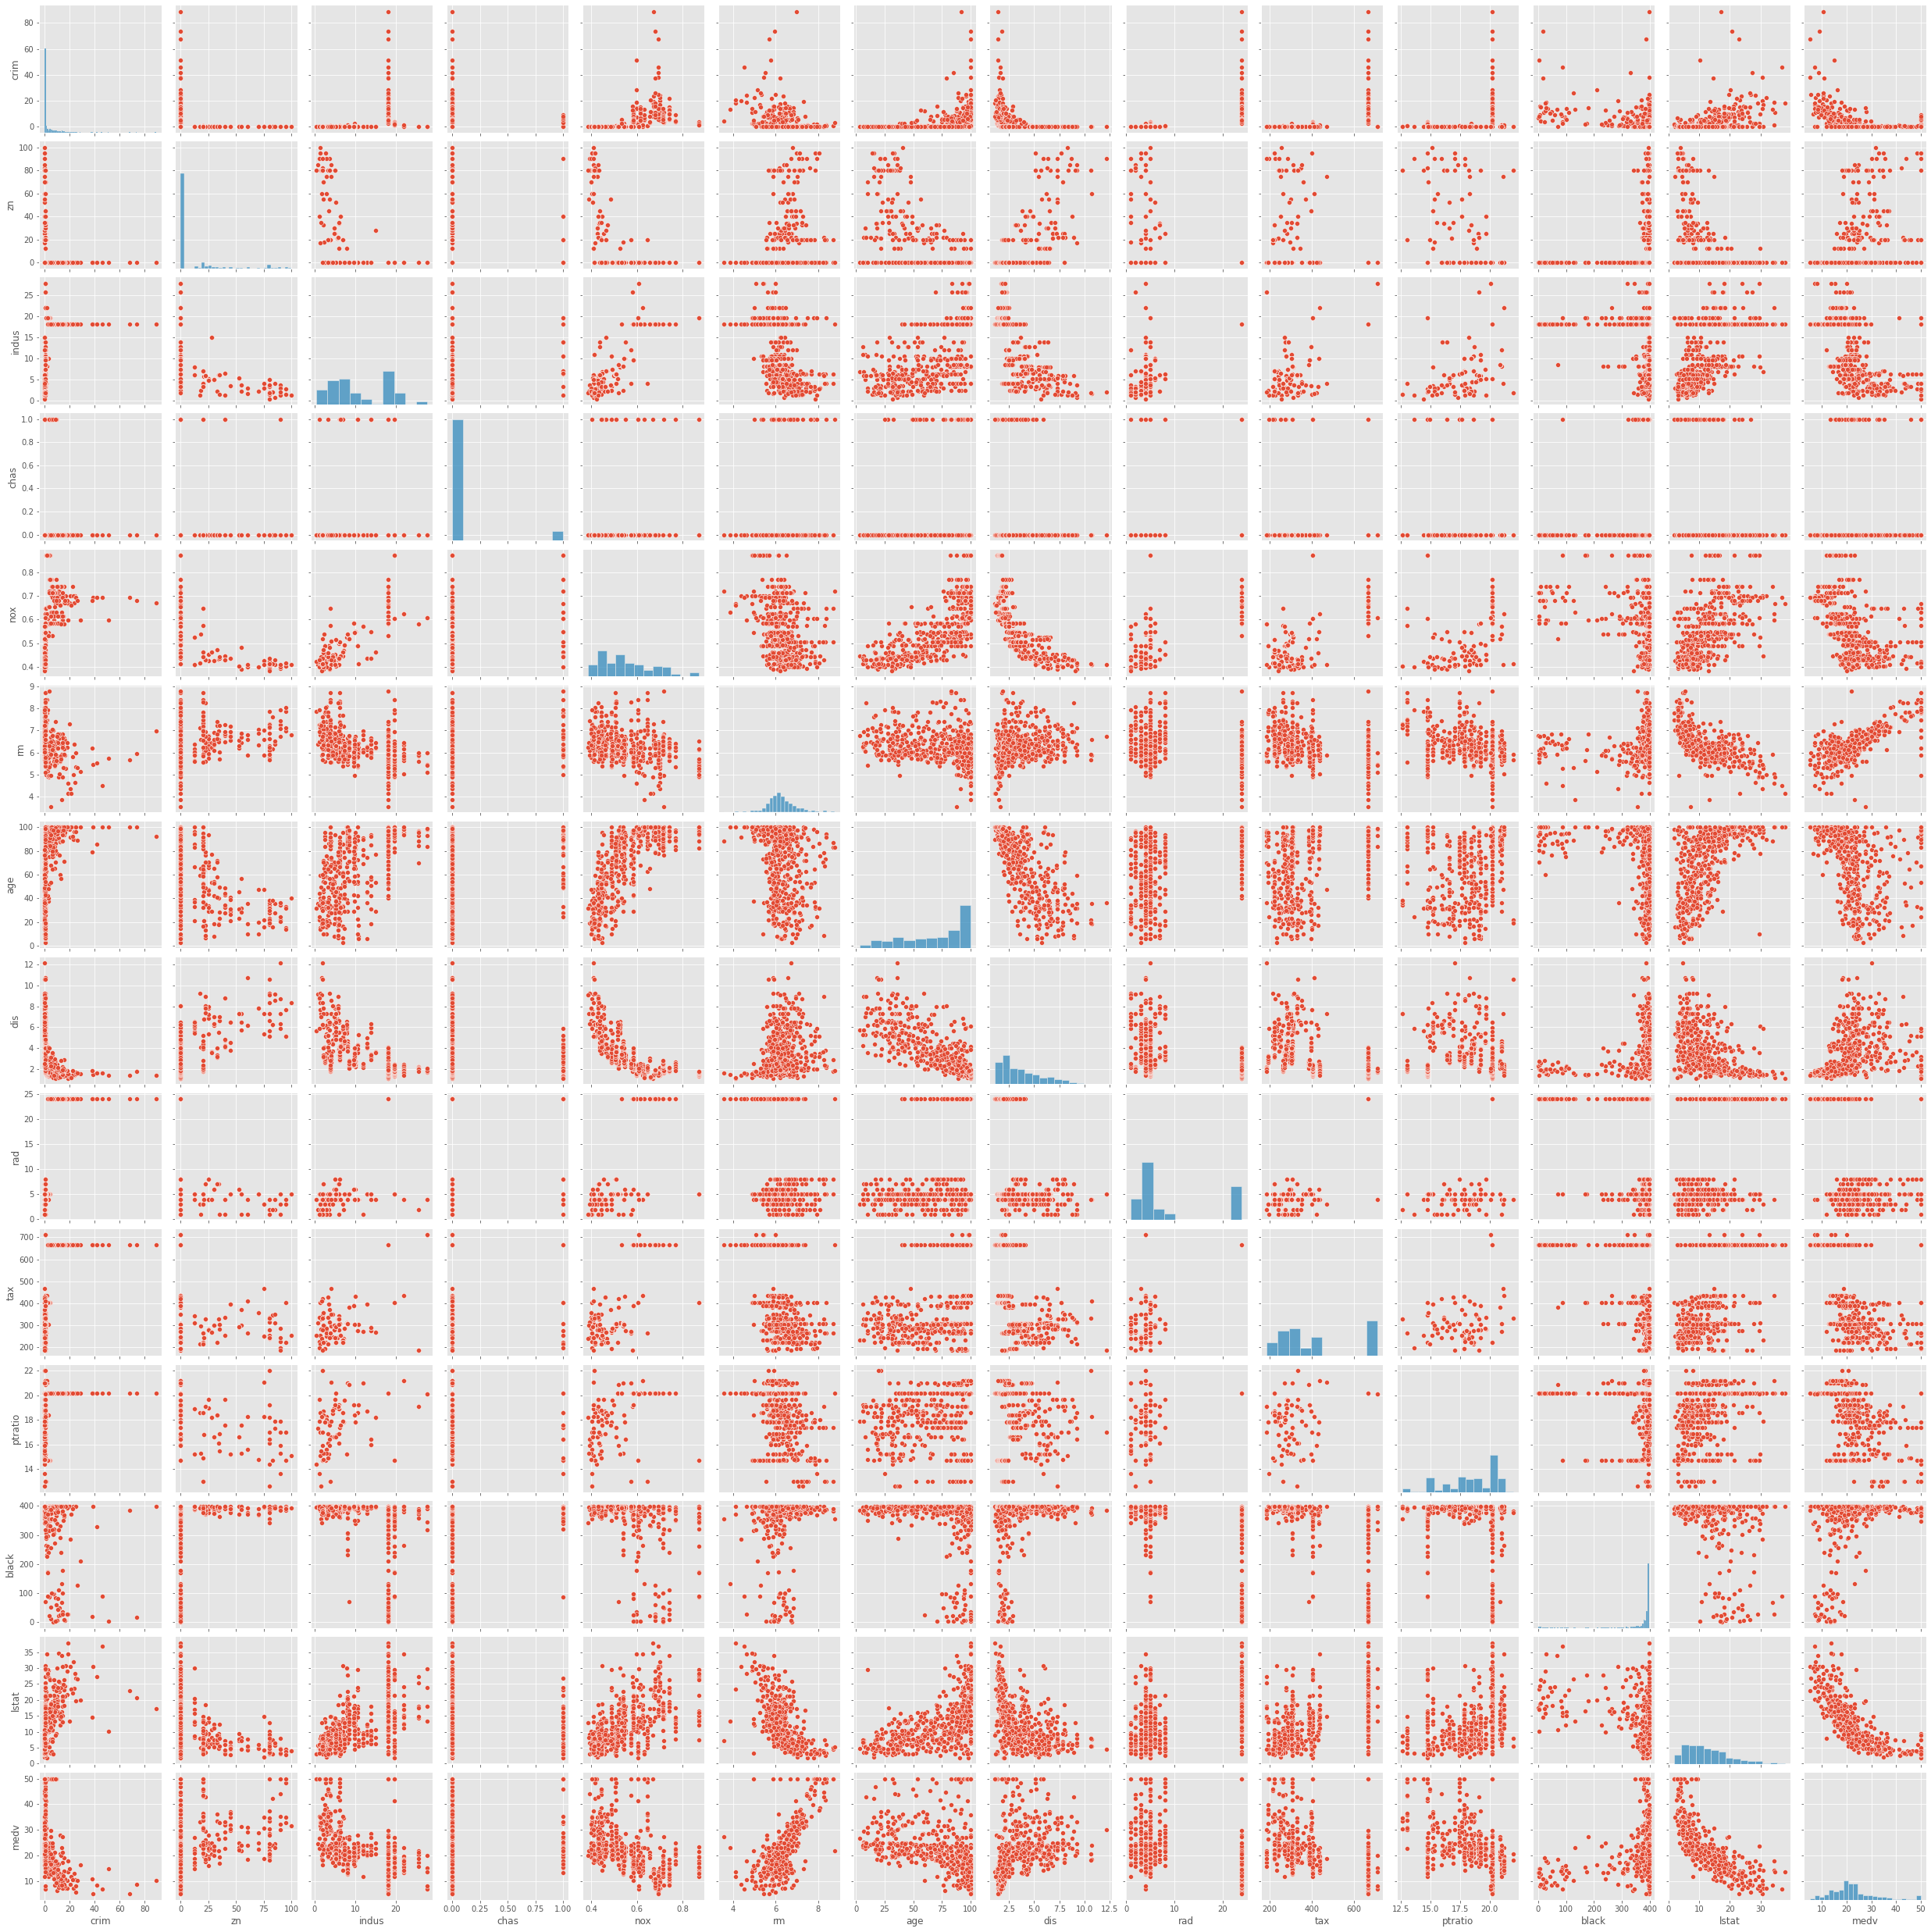

In [30]:
sns.pairplot(Boston)

In [31]:
# Plot correlation

Boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [32]:
# e No of census tracts that bound the charles river

Boston['chas'].value_counts()

0    471
1     35
Name: chas, dtype: int64

35 census tracts border charles

In [33]:
# f median teacher-pupil ratio among the towns

Boston['ptratio'].median()

19.05

In [34]:
# g cenus tract with lowest median value of owner occupied homes

Boston['medv'].idxmin()


Boston.describe()
Boston.iloc[Boston['medv'].idxmin(),:]


crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
black      396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [35]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [36]:
# h Census tracts that average 7 rooms per dwelling

(Boston['rm'] >= 7). sum(), (Boston['rm'] >= 8). sum()

(64, 13)

In [37]:
pd.DataFrame({'More than 8 rooms':Boston[Boston['rm']>=8].describe().loc['50%'],'Less than 8 rooms':Boston[Boston['rm']<8].describe().loc['50%']})

,More than 8 rooms,Less than 8 rooms
crim,0.52014,0.24522
zn,0.00000,0.00000
indus,6.20000,9.69000
chas,0.00000,0.00000
nox,0.50700,0.53800
rm,8.29700,6.18500
age,78.30000,77.30000
dis,2.89440,3.21570
rad,7.00000,5.00000
tax,307.00000,334.00000
